In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd gdrive/My\ Drive/Dataset/
!ls

/content/gdrive/My Drive/Dataset
f3dbebedcfd1b066.jpg  S__5234699.jpg  train	  vegs.h5
fdcf55fd5bab0f67.jpg  test	      validation


In [ ]:
import os
import zipfile

broccoli_dir = os.path.join('train/broccoli')
carrot_dir = os.path.join('train/carrot')
cheese_dir = os.path.join('train/cheese')
potato_dir = os.path.join('train/potato')
tomato_dir = os.path.join('train/tomato')

print('total training broccoli images:', len(os.listdir(broccoli_dir)))
print('total training carrot images:', len(os.listdir(carrot_dir)))
print('total training cheese images:', len(os.listdir(cheese_dir)))
print('total training potato images:', len(os.listdir(potato_dir)))
print('total training tomato images:', len(os.listdir(tomato_dir)))

broccoli_files = os.listdir(broccoli_dir)
print(broccoli_files[:10])
carrot_files = os.listdir(carrot_dir)
print(carrot_files[:10])
cheese_files = os.listdir(cheese_dir)
print(cheese_files[:10])
potato_files = os.listdir(potato_dir)
print(potato_files[:10])
tomato_files = os.listdir(tomato_dir)
print(tomato_files[:10])

total training broccoli images: 474
total training carrot images: 597
total training cheese images: 495
total training potato images: 304
total training tomato images: 1293
['000e1654f1d9b2cb.jpg', '00242e0447fb7877.jpg', '004bdf076237f2fb.jpg', '009b9d30a3f2bc86.jpg', '00baa39512651684.jpg', '00d6dfe8ed345ff9.jpg', '00e8c1d96333498a.jpg', '00ff63ca740b0723.jpg', '00ff1bf898beb6ea.jpg', '01017df48d26d92d.jpg']
['00013bb4b9ddfbab.jpg', '0031d1537b2e3dd6.jpg', '006c2d7ce878c7ce.jpg', '0096d83bed765696.jpg', '00af886180e9eaec.jpg', '0116a6abe3410566.jpg', '015f76a42ec879f6.jpg', '01a4d6a17c8bfac2.jpg', '01b32dadf81ac313.jpg', '01b3a4114e31efcb.jpg']
['0000a16e4b057580.jpg', '000784072165394b.jpg', '000cd56bb02e4edb.jpg', '0016cd6df8067957.jpg', '00232f3a2dd1a423.jpg', '00396d187e073216.jpg', '004c333733e994fd.jpg', '0051214e2d66ccf6.jpg', '005158d7c82534d7.jpg', '005a9501496875e3.jpg']
['00013bb4b9ddfbab.jpg', '0027f4b3758a5514.jpg', '004bbbd3c16b3770.jpg', '0067443aceca4fe1.jpg', '00714e

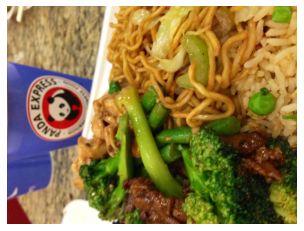

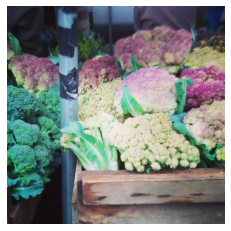

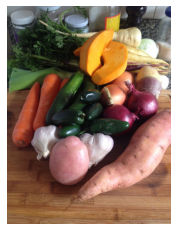

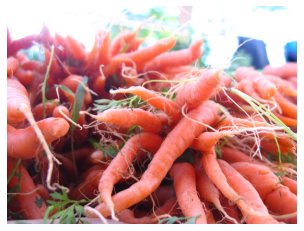

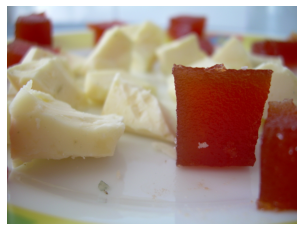

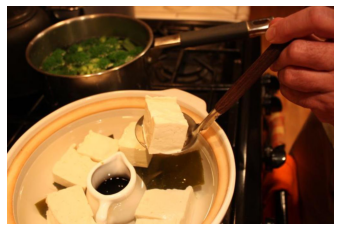

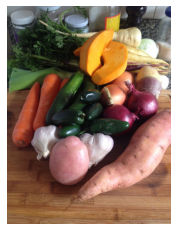

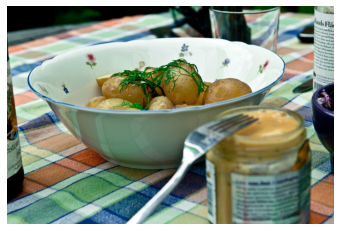

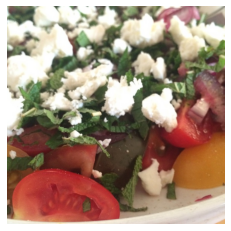

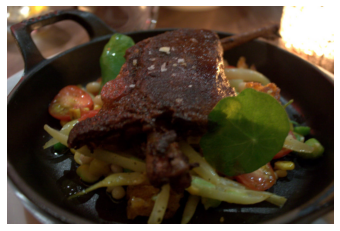

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_broccoli = [os.path.join(broccoli_dir, fname) 
                for fname in broccoli_files[pic_index-2:pic_index]]
next_carrot = [os.path.join(carrot_dir, fname) 
                for fname in carrot_files[pic_index-2:pic_index]]
next_cheese = [os.path.join(cheese_dir, fname) 
                for fname in cheese_files[pic_index-2:pic_index]]
next_potato = [os.path.join(potato_dir, fname) 
                for fname in potato_files[pic_index-2:pic_index]]
next_tomato = [os.path.join(tomato_dir, fname) 
                for fname in tomato_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_broccoli+next_carrot+next_cheese+next_potato+next_tomato):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "train/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "validation/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("vegs.h5")


Found 3163 images belonging to 5 classes.
Found 89 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
________________________________________

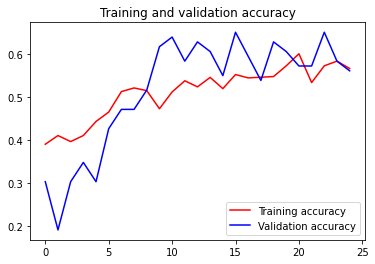

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving fdcf55fd5bab0f67.jpg to fdcf55fd5bab0f67.jpg
fdcf55fd5bab0f67.jpg
[[0. 1. 0. 0. 0.]]


In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="vegs.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('vegs.tflite', 'wb') as f:
  f.write(tflite_model)